<CENTER>
<H1>
NASA Goddard Space Flight Center <BR>
    Python User Group <BR>
2016 Python Boot Camp <br>
</H1>
</CENTER>

# An Introduction to Numerical Computing with Python (numpy)

## Reference Documents

<OL>
<LI> <A HREF="https://docs.scipy.org/doc/numpy-dev/user/quickstart.html">Numpy Tutorial</A>
<LI> <A HREF="http://docs.scipy.org/doc/numpy/reference">NumPy Reference</A>
<LI> <A HREF="http://mathesaurus.sourceforge.net/matlab-numpy.html">NumPy for MATLAB Users</A>
<LI> <A HREF="http://mathesaurus.sourceforge.net/r-numpy.html">NumPy for R (and S-Plus) Users</A>
</OL>

In case you prefer a video:

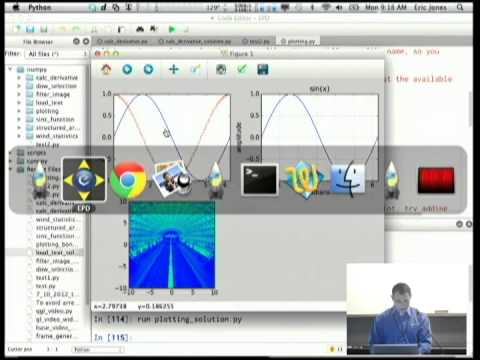

In [1]:
from IPython.display import YouTubeVideo
#YouTubeVideo("http://www.youtube.com/watch?v=3Fp1zn5ao2M")
YouTubeVideo("3Fp1zn5ao2M")

### Why the need for numpy?

While the Python language is an excellent tool for general-purpose programming, with a highly readable syntax, rich and powerful data types (strings, lists, sets, dictionaries, arbitrary length integers, etc) and a very comprehensive standard library, it was not designed specifically for mathematical and scientific computing.  Neither the language nor its standard library have facilities for the efficient representation of multidimensional datasets, tools for linear algebra and general matrix manipulations (an essential building block of virtually all technical computing), nor any data visualization facilities.

In particular, Python lists are very flexible containers that can be nested arbitrarily deep and which can hold any Python object in them, but they are poorly suited to represent efficiently common mathematical constructs like vectors and matrices.  In contrast, much of our modern heritage of scientific computing has been built on top of libraries written in the Fortran language, which has native support for vectors and matrices as well as a library of mathematical functions that can efficiently operate on entire arrays at once.

#### numpy Arrays

First we want to import the appropriate modules into our name space (note this is done automatically with the "--pylab" flag.

In [2]:
import numpy as np

The primary building block of the numpy module is the class "ndarray". A ndarray object represents a multidimensional, homogeneous array of fixed-sized items. An associated date-type object describes the format of each element in the array. An ndarray object is (almost) never instantiated directly, but instead using a method that returns an instance of the class.  Here is a pictoral representation of an "ndarray":

<img src="http://docs.scipy.org/doc/numpy-1.10.1/_images/threefundamental.png">

#### Arrays vs. Lists

In [10]:
lst = [10, 20, 30, 40]
arr = np.array([10, 20, 30, 40])

Elements of a one-dimensional array are accessed with the same syntax as a list:

In [11]:
lst[0]

10

In [12]:
arr[0]

10

In [13]:
arr[2:]

array([30, 40])

### Exercise 1: Access the final element in the arr array

In [14]:
arr[-1]

40

The first difference to note between lists and arrays is that arrays are *homogeneous*; i.e. all elements of an array must be of the same type.  In contrast, lists can contain elements of arbitrary type. For example, we can change the last element in our list above to be a string:

In [15]:
lst[-1] = 'a string inside a list'
lst

[10, 20, 30, 'a string inside a list']

but the same can not be done with an array, as we get an error message:

In [16]:
arr[-1] = 'a string inside an array'

ValueError: invalid literal for long() with base 10: 'a string inside an array'

### Array memory representation

The information about the type of an array is contained in its *dtype* attribute:

In [17]:
x = np.array([[1, 2], [3, 4]], dtype=np.uint8)
print(x)

[[1 2]
 [3 4]]


In [18]:
[b for b in bytes(x.data)]

['\x01', '\x02', '\x03', '\x04']

In [19]:
arr = np.array([10, 20, 123123])
arr.dtype

dtype('int64')

Once an array has been created, its dtype is fixed and it can only store elements of the same type.  For this example where the dtype is integer, if we store a floating point number it will be automatically converted into an integer:

In [21]:
arr[-1] = 1.234
arr

array([10, 20,  1])

Why is a homogeneous data type required for arrays? *Speed*

In [22]:
x = range(50000)
y = np.arange(50000)

%timeit [e**2  for e in x]
%timeit y**2

100 loops, best of 3: 4.81 ms per loop
The slowest run took 6.22 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 48.9 µs per loop


### Array creation

Above we created an array from an existing list; now let us now see other ways in which we can create arrays, which we'll illustrate next.  A common need is to have an array initialized with a constant value, and very often this value is 0 or 1 (suitable as starting value for additive and multiplicative loops respectively); `zeros` creates arrays of all zeros, with any desired dtype:

In [23]:
np.zeros((5, 5), dtype=np.float64)

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [24]:
np.zeros((2, 3), dtype=np.int64)

array([[0, 0, 0],
       [0, 0, 0]])

In [25]:
np.zeros(3, dtype=complex)

array([ 0.+0.j,  0.+0.j,  0.+0.j])

and similarly for `ones`:

In [26]:
np.ones(5)

array([ 1.,  1.,  1.,  1.,  1.])

Then there are the `linspace` and `logspace` functions to create linearly and logarithmically-spaced grids, respectively, with a fixed number of points and including both ends of the specified interval:

In [28]:
np.linspace(0, 1, 5)   # start, stop, num

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

### Exercise 2: Create a new array of 11 elements logarithmically spaced from 1 to 100:

In [29]:
x = np.logspace(0, 2, 11)
x

array([   1.        ,    1.58489319,    2.51188643,    3.98107171,
          6.30957344,   10.        ,   15.84893192,   25.11886432,
         39.81071706,   63.09573445,  100.        ])

Finally, it is often useful to create arrays with random numbers that follow a specific distribution.  The `np.random` module provides several random number generators.  For example, here we produce an array of 5 random samples taken from a standard normal distribution (0 mean and variance 1):

In [30]:
rng = np.random.RandomState(0)  # <-- seed value, do not have to specify, but useful for reproducibility

In [32]:
rng.normal(loc=0, scale=1, size=5)

array([-0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

Or the same, but from a uniform distribution:

In [33]:
uni = rng.uniform(-10, 10, size=5)  # 5 random numbers, picked from a uniform distribution between -10 and 10
print(uni)

[ 5.83450076  0.5778984   1.36089122  8.51193277 -8.57927884]


### Indexing with other arrays

Above we saw how to index arrays with single numbers and slices, just like Python lists.  But arrays allow for a more sophisticated kind of indexing which is very powerful: you can index an array with another array, and in particular with an array of boolean values.  This is particluarly useful to extract information from an array that matches a certain condition.

Consider for example that in the array `uni` we want to replace all values above 0 with the value 10.  We can do so by first finding the *mask* that indicates where this condition is true or false:

In [34]:
mask = uni > 0
mask

array([ True,  True,  True,  True, False], dtype=bool)

Now that we have this mask, we can use it to either read those values or to reset them to 0:

In [35]:
print('Array:', uni)
print('Masked array:', uni[mask])

('Array:', array([ 5.83450076,  0.5778984 ,  1.36089122,  8.51193277, -8.57927884]))
('Masked array:', array([ 5.83450076,  0.5778984 ,  1.36089122,  8.51193277]))


In [36]:
uni[mask] = 10
print(uni)

[ 10.          10.          10.          10.          -8.57927884]


### Arrays with more than one dimension

Most of the array creation methods can be used to construct >1D arrays:

In [37]:
np.zeros((3, 4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

We can also reshape arrays to fit the desired shape:

In [38]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [39]:
arr = np.arange(12).reshape((3, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

With two-dimensional arrays we start seeing the power of numpy: while a nested list can be indexed using repeatedly the `[ ]` operator, multidimensional arrays support a more direct indexing syntax with a single `[ ]` and a set of indices separated by commas:

<img src="http://memory.osu.edu/classes/python/_images/numpy_indexing.png">

### Exercise #3: Retrieve the last entry from all the even numbered rows in the above array "arr" (0 indexed)

In [41]:
arr[::2,-1]

array([ 3, 11])

Slices Refer the Array Data
<UL>
<LI> With a as list, a[:] makes a copy of the data	
<LI> With a as array, a[:] is a reference to the data
</UL>

In [56]:
a = np.linspace(0, 29, 30)
a.shape = (5,6)
print a
b = a[1,:]      # extract 2nd column of a
print a[1,1]
b[1] = 2
print a[1,1]

[[  0.   1.   2.   3.   4.   5.]
 [  6.   7.   8.   9.  10.  11.]
 [ 12.  13.  14.  15.  16.  17.]
 [ 18.  19.  20.  21.  22.  23.]
 [ 24.  25.  26.  27.  28.  29.]]
7.0
2.0


In [57]:
# Take a copy to avoid referencing via slices:
b = a[1,:].copy()
print a[1,1]
b[1] = 7777     # b and a are two different arrays now
print a[1,1]

2.0
2.0


### Other numpy functions and array properties

Now that we have seen how to create arrays with more than one dimension, let's take a look at some other properties.

In [42]:
print('Data type                :', arr.dtype)
print('Total number of elements :', arr.size)
print('Number of dimensions     :', arr.ndim)
print('Shape (dimensionality)   :', arr.shape)
print('Memory used (in bytes)   :', arr.nbytes)

('Data type                :', dtype('int64'))
('Total number of elements :', 12)
('Number of dimensions     :', 2)
('Shape (dimensionality)   :', (3, 4))
('Memory used (in bytes)   :', 96)


There are also many useful functions in numpy that operate on arrays, e.g.:

In [43]:
print('Minimum and maximum             :', np.min(arr), np.max(arr))
print('Sum and product of all elements :', np.sum(arr), np.prod(arr))
print('Mean and standard deviation     :', np.mean(arr), np.std(arr))

('Minimum and maximum             :', 0, 11)
('Sum and product of all elements :', 66, 0)
('Mean and standard deviation     :', 5.5, 3.4520525295346629)


For these methods, the above operations area all computed on all the elements of the array.  But for a multidimensional array, it's possible to do the computation along a single dimension, by passing the `axis` parameter; for example:

In [44]:
print('For the following array:\n', arr)
print('The sum of elements along the rows is    :', np.sum(arr, axis=1))
print('The sum of elements along the columns is :', np.sum(arr, axis=0))

('For the following array:\n', array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]]))
('The sum of elements along the rows is    :', array([ 6, 22, 38]))
('The sum of elements along the columns is :', array([12, 15, 18, 21]))


As you can see in this example, the value of the `axis` parameter is the dimension which will be *consumed* once the operation has been carried out.  This is why to sum along the rows we use `axis=0`.

Another widely used property of arrays is the `.T` attribute, which allows you to access the transpose of the array (NumPy does this without making a copy of the array, by manipulating its strides):

In [46]:
print('Array:\n', arr)
print('Transpose:\n', arr.T)

('Array:\n', array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]]))
('Transpose:\n', array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]]))


We don't have time here to look at all the numpy functions that operate on arrays, but here's a complete list.  Simply try exploring some of these IPython to learn more, or read their description in their docstrings or the [Numpy documentation](http://docs.scipy.org/doc/numpy/reference/):

```
np.ALLOW_THREADS              np.compress                   np.irr                        np.pv
np.BUFSIZE                    np.concatenate                np.is_busday                  np.r_
np.CLIP                       np.conj                       np.isclose                    np.rad2deg
np.ComplexWarning             np.conjugate                  np.iscomplex                  np.radians
np.DataSource                 np.convolve                   np.iscomplexobj               np.random
np.ERR_CALL                   np.copy                       np.isfinite                   np.rank
np.ERR_DEFAULT                np.copysign                   np.isfortran                  np.rate
np.ERR_IGNORE                 np.copyto                     np.isinf                      np.ravel
np.ERR_LOG                    np.core                       np.isnan                      np.ravel_multi_index
np.ERR_PRINT                  np.corrcoef                   np.isneginf                   np.real
np.ERR_RAISE                  np.correlate                  np.isposinf                   np.real_if_close
np.ERR_WARN                   np.cos                        np.isreal                     np.rec
np.FLOATING_POINT_SUPPORT     np.cosh                       np.isrealobj                  np.recarray
np.FPE_DIVIDEBYZERO           np.count_nonzero              np.isscalar                   np.recfromcsv
np.FPE_INVALID                np.cov                        np.issctype                   np.recfromtxt
np.FPE_OVERFLOW               np.cross                      np.issubclass_                np.reciprocal
np.FPE_UNDERFLOW              np.csingle                    np.issubdtype                 np.record
np.False_                     np.ctypeslib                  np.issubsctype                np.remainder
np.Inf                        np.cumprod                    np.iterable                   np.repeat
np.Infinity                   np.cumproduct                 np.ix_                        np.require
np.MAXDIMS                    np.cumsum                     np.kaiser                     np.reshape
np.MachAr                     np.datetime64                 np.kron                       np.resize
np.ModuleDeprecationWarning   np.datetime_as_string         np.ldexp                      np.restoredot
np.NAN                        np.datetime_data              np.left_shift                 np.result_type
np.NINF                       np.deg2rad                    np.less                       np.right_shift
np.NZERO                      np.degrees                    np.less_equal                 np.rint
np.NaN                        np.delete                     np.lexsort                    np.roll
np.PINF                       np.deprecate                  np.lib                        np.rollaxis
np.PZERO                      np.deprecate_with_doc         np.linalg                     np.roots
np.PackageLoader              np.diag                       np.linspace                   np.rot90
np.RAISE                      np.diag_indices               np.little_endian              np.round
np.RankWarning                np.diag_indices_from          np.load                       np.round_
np.SHIFT_DIVIDEBYZERO         np.diagflat                   np.loads                      np.row_stack
np.SHIFT_INVALID              np.diagonal                   np.loadtxt                    np.s_
np.SHIFT_OVERFLOW             np.diff                       np.log                        np.safe_eval
np.SHIFT_UNDERFLOW            np.digitize                   np.log10                      np.save
np.ScalarType                 np.disp                       np.log1p                      np.savetxt
np.Tester                     np.divide                     np.log2                       np.savez
np.True_                      np.division                   np.logaddexp                  np.savez_compressed
np.UFUNC_BUFSIZE_DEFAULT      np.dot                        np.logaddexp2                 np.sctype2char
np.UFUNC_PYVALS_NAME          np.double                     np.logical_and                np.sctypeDict
np.VisibleDeprecationWarning  np.dsplit                     np.logical_not                np.sctypeNA
np.WRAP                       np.dstack                     np.logical_or                 np.sctypes
np.abs                        np.dtype                      np.logical_xor                np.searchsorted
np.absolute                   np.e                          np.logspace                   np.select
np.absolute_import            np.ediff1d                    np.long                       np.set_numeric_ops
np.add                        np.einsum                     np.longcomplex                np.set_printoptions
np.add_docstring              np.emath                      np.longdouble                 np.set_string_function
np.add_newdoc                 np.empty                      np.longfloat                  np.setbufsize
np.add_newdoc_ufunc           np.empty_like                 np.longlong                   np.setdiff1d
np.add_newdocs                np.equal                      np.lookfor                    np.seterr
np.alen                       np.errstate                   np.ma                         np.seterrcall
np.all                        np.euler_gamma                np.mafromtxt                  np.seterrobj
np.allclose                   np.exp                        np.mask_indices               np.setxor1d
np.alltrue                    np.exp2                       np.mat                        np.shape
np.alterdot                   np.expand_dims                np.math                       np.short
np.amax                       np.expm1                      np.matrix                     np.show_config
np.amin                       np.extract                    np.matrixlib                  np.sign
np.angle                      np.eye                        np.max                        np.signbit
np.any                        np.fabs                       np.maximum                    np.signedinteger
np.append                     np.fastCopyAndTranspose       np.maximum_sctype             np.sin
np.apply_along_axis           np.fft                        np.may_share_memory           np.sinc
np.apply_over_axes            np.fill_diagonal              np.mean                       np.single
np.arange                     np.find_common_type           np.median                     np.singlecomplex
np.arccos                     np.finfo                      np.memmap                     np.sinh
np.arccosh                    np.fix                        np.meshgrid                   np.size
np.arcsin                     np.flatiter                   np.mgrid                      np.sometrue
np.arcsinh                    np.flatnonzero                np.min                        np.sort
np.arctan                     np.flexible                   np.min_scalar_type            np.sort_complex
np.arctan2                    np.fliplr                     np.minimum                    np.source
np.arctanh                    np.flipud                     np.mintypecode                np.spacing
np.argmax                     np.float                      np.mirr                       np.split
np.argmin                     np.float128                   np.mod                        np.sqrt
np.argpartition               np.float16                    np.modf                       np.square
np.argsort                    np.float32                    np.msort                      np.squeeze
np.argwhere                   np.float64                    np.multiply                   np.stack
np.around                     np.float_                     np.nan                        np.std
np.array                      np.floating                   np.nan_to_num                 np.str
np.array2string               np.floor                      np.nanargmax                  np.str0
np.array_equal                np.floor_divide               np.nanargmin                  np.str_
np.array_equiv                np.fmax                       np.nanmax                     np.string_
np.array_repr                 np.fmin                       np.nanmean                    np.subtract
np.array_split                np.fmod                       np.nanmedian                  np.sum
np.array_str                  np.format_parser              np.nanmin                     np.swapaxes
np.asanyarray                 np.frexp                      np.nanpercentile              np.sys
np.asarray                    np.frombuffer                 np.nanprod                    np.take
np.asarray_chkfinite          np.fromfile                   np.nanstd                     np.tan
np.ascontiguousarray          np.fromfunction               np.nansum                     np.tanh
np.asfarray                   np.fromiter                   np.nanvar                     np.tensordot
np.asfortranarray             np.frompyfunc                 np.nbytes                     np.test
np.asmatrix                   np.fromregex                  np.ndarray                    np.testing
np.asscalar                   np.fromstring                 np.ndenumerate                np.tile
np.atleast_1d                 np.full                       np.ndfromtxt                  np.timedelta64
np.atleast_2d                 np.full_like                  np.ndim                       np.trace
np.atleast_3d                 np.fv                         np.ndindex                    np.transpose
np.average                    np.generic                    np.nditer                     np.trapz
np.bartlett                   np.genfromtxt                 np.negative                   np.tri
np.base_repr                  np.get_array_wrap             np.nested_iters               np.tril
np.bench                      np.get_include                np.newaxis                    np.tril_indices
np.binary_repr                np.get_printoptions           np.nextafter                  np.tril_indices_from
np.bincount                   np.getbufsize                 np.nonzero                    np.trim_zeros
np.bitwise_and                np.geterr                     np.not_equal                  np.triu
np.bitwise_not                np.geterrcall                 np.nper                       np.triu_indices
np.bitwise_or                 np.geterrobj                  np.npv                        np.triu_indices_from
np.bitwise_xor                np.gradient                   np.numarray                   np.true_divide
np.blackman                   np.greater                    np.number                     np.trunc
np.bmat                       np.greater_equal              np.obj2sctype                 np.typeDict
np.bool                       np.half                       np.object                     np.typeNA
np.bool8                      np.hamming                    np.object0                    np.typecodes
np.bool_                      np.hanning                    np.object_                    np.typename
np.broadcast                  np.histogram                  np.ogrid                      np.ubyte
np.broadcast_arrays           np.histogram2d                np.oldnumeric                 np.ufunc
np.broadcast_to               np.histogramdd                np.ones                       np.uint
np.busday_count               np.hsplit                     np.ones_like                  np.uint0
np.busday_offset              np.hstack                     np.outer                      np.uint16
np.busdaycalendar             np.hypot                      np.packbits                   np.uint32
np.byte                       np.i0                         np.pad                        np.uint64
np.byte_bounds                np.identity                   np.partition                  np.uint8
np.bytes0                     np.iinfo                      np.percentile                 np.uintc
np.bytes_                     np.imag                       np.pi                         np.uintp
np.c_                         np.in1d                       np.piecewise                  np.ulonglong
np.can_cast                   np.index_exp                  np.pkgload                    np.unicode
np.cast                       np.indices                    np.place                      np.unicode_
np.cbrt                       np.inexact                    np.pmt                        np.union1d
np.cdouble                    np.inf                        np.poly                       np.unique
np.ceil                       np.info                       np.poly1d                     np.unpackbits
np.cfloat                     np.infty                      np.polyadd                    np.unravel_index
np.char                       np.inner                      np.polyder                    np.unsignedinteger
np.character                  np.insert                     np.polydiv                    np.unwrap
np.chararray                  np.int                        np.polyfit                    np.ushort
np.choose                     np.int0                       np.polyint                    np.vander
np.clip                       np.int16                      np.polymul                    np.var
np.clongdouble                np.int32                      np.polynomial                 np.vdot
np.clongfloat                 np.int64                      np.polysub                    np.vectorize
np.column_stack               np.int8                       np.polyval                    np.version
np.common_type                np.int_                       np.power                      np.void
np.compare_chararrays         np.int_asbuffer               np.ppmt                       np.void0
np.compat                     np.intc                       np.print_function             np.vsplit
np.complex                    np.integer                    np.prod                       np.vstack
np.complex128                 np.interp                     np.product                    np.warnings
np.complex256                 np.intersect1d                np.promote_types              np.where
np.complex64                  np.intp                       np.ptp                        np.who
np.complex_                   np.invert                     np.put                        np.zeros
np.complexfloating            np.ipmt                       np.putmask                    np.zeros_like
```

Exercise #4: Find more information about the "correlate" method

In [48]:
np.correlate??

## Operating with arrays

Standard mathematical operations Just Work (TM):

In [49]:
arr1 = np.arange(4)
arr2 = np.arange(10, 14)
print(arr1, '+', arr2, '=', arr1 + arr2)

(array([0, 1, 2, 3]), '+', array([10, 11, 12, 13]), '=', array([10, 12, 14, 16]))


Note, that, unlike in MATLAB, operations are performed element-wise:

In [50]:
print(arr1, '*', arr2, '=', arr1 * arr2)

(array([0, 1, 2, 3]), '*', array([10, 11, 12, 13]), '=', array([ 0, 11, 24, 39]))


While this means that, in principle, arrays must always match in their dimensionality in order for an operation to be valid, numpy will *broadcast* dimensions when possible.  For example, suppose that you want to add the number 3 to `arr1`, this works:

In [51]:
arr1 + 3

array([3, 4, 5, 6])

### The broadcasting rules

This broadcasting behavior is powerful, especially because when numpy broadcasts to create new dimensions or to 'stretch' existing ones, it doesn't replicate the data.  In the example above the operation is carried *as if* the 3 was a 1-d array with 3 in all of its entries, but no actual array was ever created.  This can save memory in cases when the arrays in question are large, with significant performance implications.

The general rule is: when operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward, creating dimensions of length 1 as needed. Two dimensions are considered compatible when

* they are equal or either is None or one
* either dimension is 1 or ``None``, or if dimensions are equal

If these conditions are not met, a `ValueError: frames are not aligned` exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the maximum size along each dimension of the input arrays.

Examples below:

```
(9, 5)   (9, 5)   (9, 5)   (9, 1)
   ( )   (9, 1)   (   5)   (   5)
------   ------   ------   ------
(9, 5)   (9, 5)   (9, 5)   (9, 5)

```

<img src="Broadcasting.png"/>

Sketch from [Nicolas Rougier's NumPy tutorial](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html)

### Exercise #4: Use broadcasting to generate a 6x6 identity array from two one-dimensional arrays.

In [52]:
np.ones((6,1)) * np.ones((1,6))

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

Sometimes, it is necessary to modify arrays before they can be used together.  Numpy allows you to add new axes to an array by indexing with `np.newaxis`:

In [53]:
c = np.arange(5)
d = np.arange(6)

print(c.shape)
print(d.shape)

c + d

(5,)
(6,)


ValueError: operands could not be broadcast together with shapes (5,) (6,) 

In [54]:
c = np.arange(5)
d = np.arange(6)

c = c[:, np.newaxis]

print(c.shape)
print('  ', d.shape)
print('-------')
print((c + d).shape)
 
#   d d d d d d
#
# c              c c c c c c   d d d d d d
# c              c c c c c c   d d d d d d
# c     +      = c c c c c c + d d d d d d
# c              c c c c c c   d d d d d d
# c              c c c c c c   d d d d d d

c + d

(5, 1)
('  ', (6,))
-------
(5, 6)


array([[0, 1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5, 6],
       [2, 3, 4, 5, 6, 7],
       [3, 4, 5, 6, 7, 8],
       [4, 5, 6, 7, 8, 9]])

#### Array Computations

In [58]:
b = 3*a - 1    # a is array, b becomes array

The above operation generates a temporary array:
<OL>
<LI> tb = 3*a
<LI> b = tb - 1
</OL>
As far as possible, we want to avoid the creation
  of temporary arrays to limit the memory usage and
  to decrease the computational time associated with
  with array computations.

#### In-Place Array Arithmetics

In [59]:
b = a
b *= 3  # or multiply(b, 3, b)
b -= 1  # or subtract(b, 1, b)

In-place operations:
    
   a *= 3.0     # multiply a's elements by 3
   a -= 1.0     # subtract 1 from each element
   a /= 3.0     # divide each element by 3
   a += 1.0     # add 1 to each element
   a **= 2.0    # square all elements

#### Math Functions and Array Arguments

In [ ]:
   # let b be an array
   
   c = sin(b)    
   c = arcsin(c) 
   c = sinh(b)
   # same functions for the cos and tan families
   c = b**2.5  # power function
   c = log(b)
   c = exp(b)
   c = sqrt(b)
    
   # a is an array
   a.clip(min=3, max=12)  	# clip elements
   a.mean(); mean(a)     	# mean value
   a.var();  var(a)       	# variance
   a.std();  std(a)        	# standard deviation
   median(a)
   cov(x,y)              	# covariance
   trapz(a)              	# Trapezoidal integration
   diff(a)               	# finite differences (da/dx)


### Exercise #5: 

#### Universal Functions and Loops

Universal functions run much faster than for loops, which should be avoided whenever possible

In [60]:
def mult1(a,b):
    return a * b

def mult2(a,b):
    c = np.empty(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            c[i,j] = a[i,j] * b[i,j]
    return c

In [61]:
a = np.random.random((800,800))
b = np.random.random((800,800))

In [62]:
%timeit mult1(a,b)

1000 loops, best of 3: 1.34 ms per loop


In [63]:
%timeit mult2(a,b)

1 loop, best of 3: 347 ms per loop


### Exercise #6: Compare the time it takes ...

## Linear algebra in numpy

Numpy ships with a basic linear algebra library, and all arrays have a `dot` method whose behavior is that of the scalar dot product when its arguments are vectors (one-dimensional arrays) and the traditional matrix multiplication when one or both of its arguments are two-dimensional arrays:

In [65]:
v1 = np.array([2, 3, 4])
v2 = np.array([1, 0, 1])
print(v1, '·', v2, '=', v1.dot(v2))

(array([2, 3, 4]), '\xc2\xb7', array([1, 0, 1]), '=', 6)


In [66]:
A = np.arange(6).reshape(2, 3)
print('A:\n', A)
print('v1:\n', v1)

('A:\n', array([[0, 1, 2],
       [3, 4, 5]]))
('v1:\n', array([2, 3, 4]))


In [67]:
A.dot(v1)

array([11, 38])

For matrix-matrix multiplication, the same dimension-matching rules must be satisfied, e.g. consider the difference between $A \times A^T$:

In [68]:
print(A.dot(A.T))

[[ 5 14]
 [14 50]]


and $A^T \times A$:

In [70]:
print(A.T.dot(A))

[[ 9 12 15]
 [12 17 22]
 [15 22 29]]


Furthermore, the `numpy.linalg` module includes additional functionality such as determinants, matrix norms, Cholesky, eigenvalue and singular value decompositions, etc.  For even more linear algebra tools, `scipy.linalg` contains the majority of the tools in the classic LAPACK libraries as well as functions to operate on sparse matrices.  We refer the reader to the Numpy and Scipy documentations for additional details on these.

## Reading and writing arrays to disk

Numpy lets you read and write arrays into files in a number of ways.  In order to use these tools well, it is critical to understand the difference between a *text* and a *binary* file containing numerical data.  In a text file, the number $\pi$ could be written as "3.141592653589793", for example: a string of digits that a human can read, with in this case 15 decimal digits.  In contrast, that same number written to a binary file would be encoded as 8 characters (bytes) that are not readable by a human but which contain the exact same data that the variable `pi` had in the computer's memory.  

The tradeoffs between the two modes are thus:

* Text mode: occupies more space, precision can be lost (if not all digits are written to disk), but is readable and editable by hand with a text editor.  Can *only* be used for one- and two-dimensional arrays.

* Binary mode: compact and exact representation of the data in memory, can't be read or edited by hand.  Arrays of any size and dimensionality can be saved and read without loss of information.

First, let's see how to read and write arrays in text mode.  The `np.savetxt` function saves an array to a text file, with options to control the precision, separators and even adding a header:

In [72]:
arr = np.arange(10).reshape(2, 5)
print(arr)                            
np.savetxt('test.out', arr)

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [73]:
!cat test.out

0.000000000000000000e+00 1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00
5.000000000000000000e+00 6.000000000000000000e+00 7.000000000000000000e+00 8.000000000000000000e+00 9.000000000000000000e+00


And this same type of file can then be read with the matching `np.loadtxt` function:

In [74]:
arr2 = np.loadtxt('test.out')
print(arr2)

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


For binary data, Numpy provides the `np.save` and `np.savez` routines.  The first saves a single array to a file with `.npy` extension, while the latter can be used to save a *group* of arrays into a single file with `.npz` extension.  The files created with these routines can then be read with the `np.load` function.

Let us first see how to use the simpler `np.save` function to save a single array:

In [76]:
np.save('test.npy', arr)
# Now we read this back
arr_loaded = np.load('test.npy')

print(arr)
print(arr_loaded)

print(arr_loaded.dtype)

# Let's see if any element is non-zero in the difference.
# A value of True would be a problem.
print('Any differences?', np.any(arr - arr_loaded))

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1 2 3 4]
 [5 6 7 8 9]]
int64
('Any differences?', False)


Now let us see how the `np.savez_compressed` function works.

In [77]:
np.savez_compressed('test.npz', first=arr, second=arr2)
arrays = np.load('test.npz')
arrays.files

['second', 'first']

The object returned by `np.load` from an `.npz` file works like a dictionary:

In [78]:
arrays['first']

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

This `.npz` format is a very convenient way to package compactly and without loss of information, into a single file, a group of related arrays that pertain to a specific problem.  At some point, however, the complexity of your dataset may be such that the optimal approach is to use one of the standard formats in scientific data processing that have been designed to handle complex datasets, such as NetCDF or HDF5.  

Fortunately, there are tools for manipulating these formats in Python, and for storing data in other ways such as databases.  A complete discussion of the possibilities is beyond the scope of this tutorial, but of particular interest for scientific users we at least mention the following:

* The `scipy.io` module contains routines to read and write Matlab files in `.mat` format and files in the NetCDF format that is widely used in certain scientific disciplines.

* For manipulating files in the HDF5 format, there are two excellent options in Python: the **PyTables** project offers a high-level, object oriented approach to manipulating HDF5 datasets, while the **h5py** project offers a more direct mapping to the standard HDF5 library interface.  Both are excellent tools; if you need to work with HDF5 datasets you should read some of their documentation and examples and decide which approach is a better match for your needs.